In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os
import torch
import numpy as np

import sys
sys.path.append("/home/anvuong/Desktop/codes/minDDPM")
from model import Model
from min_ddpm import MinDDPM

%matplotlib inline

In [2]:
model_config = {
    "in_dim": 2,
    "out_dim": 2,
    "embed_dim": 128,
    "num_layers": 4,
    "residual": False,
}
model = Model(**model_config)
total_params = sum([p.numel() for p in model.parameters()])
print("Model initialized, total params = ", total_params)

ddpm_config = {"beta1": 1e-4, "beta2": 0.02, "T": 1000, "schedule": "linear"}
ddpm = MinDDPM(model=model, **ddpm_config)

working_dir = "../static/swissroll"
model_name = "model.pth"
ddpm.load_state_dict(torch.load(os.path.join(working_dir, model_name)))

# perform sampling
# x = torch.ones((1000, 2))
# x, hist = ddpm.sample(x)

Model initialized, total params =  83074


<All keys matched successfully>

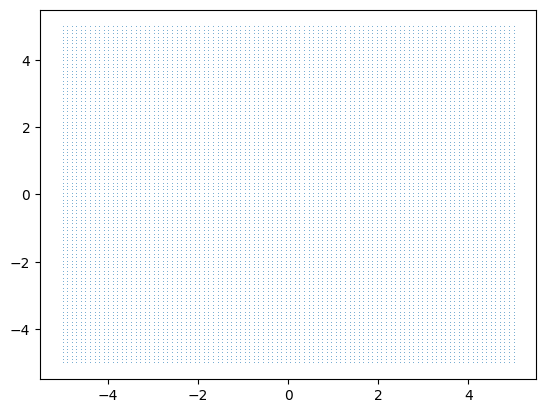

In [3]:
r = np.linspace(-5, 5, 100, dtype=float)
xx, yy = np.meshgrid(r, r)
X = np.array(list(zip(xx.ravel(), yy.ravel())))
sns.scatterplot(x=X[:,0], y=X[:,1], s=0.5)
plt.show()

In [7]:
x = torch.from_numpy(X)
x = x.float()
x.shape

torch.Size([10000, 2])

In [5]:
x, hist = ddpm.sample_with_start(x)

Start sampling ...


     sampling batch 0 : : 1000it [00:02, 447.74it/s]
     sampling batch 1 : : 1000it [00:01, 734.33it/s]
     sampling batch 2 : : 1000it [00:01, 734.02it/s]
     sampling batch 3 : : 1000it [00:01, 732.72it/s]
     sampling batch 4 : : 1000it [00:01, 736.70it/s]
     sampling batch 5 : : 1000it [00:01, 731.59it/s]
     sampling batch 6 : : 1000it [00:01, 744.90it/s]
     sampling batch 7 : : 1000it [00:01, 754.28it/s]
     sampling batch 8 : : 1000it [00:01, 728.61it/s]
     sampling batch 9 : : 1000it [00:01, 764.13it/s]


Done sampling!


In [8]:
x_field, hist_field = ddpm.sample_vector_field_with_start(x)

Start sampling ...



0it [00:00, ?it/s]
     sampling batch 0 : : 0it [00:00, ?it/s]
     sampling batch 0 : : 72it [00:00, 719.70it/s]
     sampling batch 0 : : 159it [00:00, 806.19it/s]
     sampling batch 0 : : 245it [00:00, 830.65it/s]
     sampling batch 0 : : 331it [00:00, 841.67it/s]
     sampling batch 0 : : 418it [00:00, 851.58it/s]
     sampling batch 0 : : 505it [00:00, 857.66it/s]
     sampling batch 0 : : 591it [00:00, 852.24it/s]
     sampling batch 0 : : 678it [00:00, 855.75it/s]
     sampling batch 0 : : 765it [00:00, 858.85it/s]
     sampling batch 0 : : 852it [00:01, 861.05it/s]
     sampling batch 0 : : 1000it [00:01, 850.46it/s][A

0it [00:00, ?it/s]
     sampling batch 1 : : 0it [00:00, ?it/s]
     sampling batch 1 : : 79it [00:00, 783.64it/s]
     sampling batch 1 : : 166it [00:00, 830.44it/s]
     sampling batch 1 : : 250it [00:00, 831.03it/s]
     sampling batch 1 : : 334it [00:00, 819.65it/s]
     sampling batch 1 : : 416it [00:00, 804.50it/s]
     sampling batch 1 : : 503it [00:0

Done sampling!


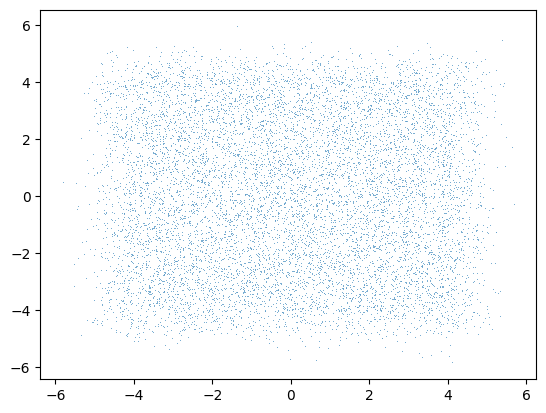

In [6]:
Xs = hist[3]
sns.scatterplot(x=Xs[:,0], y=Xs[:,1], s=0.5)
plt.show()

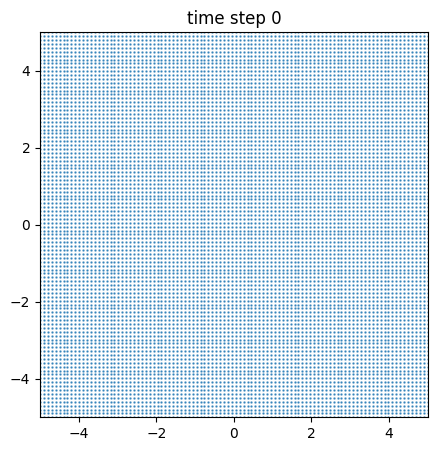

In [7]:
# create gif of images evolving over time, based on Xt_history
def animate_diff(i, Xt_history):
    plt.cla()
    plots = sns.scatterplot(
        x=Xt_history[i][:, 0], y=Xt_history[i][:, 1], s=3, alpha=0.9
    )
    plots.set_xlim(-5, 5)
    plots.set_ylim(-5, 5)
    plots.set_title(f"time step {i*5}")
    return plots

fig = plt.figure(figsize=(5, 5))
plt.clf()

ani = FuncAnimation(
    fig,
    animate_diff,
    fargs=[hist],
    interval=50,
    blit=False,
    repeat=False,
    frames=len(hist),
)
ani.save(
        os.path.join("animation.gif"),
        dpi=100,
        writer=PillowWriter(fps=5),
    )

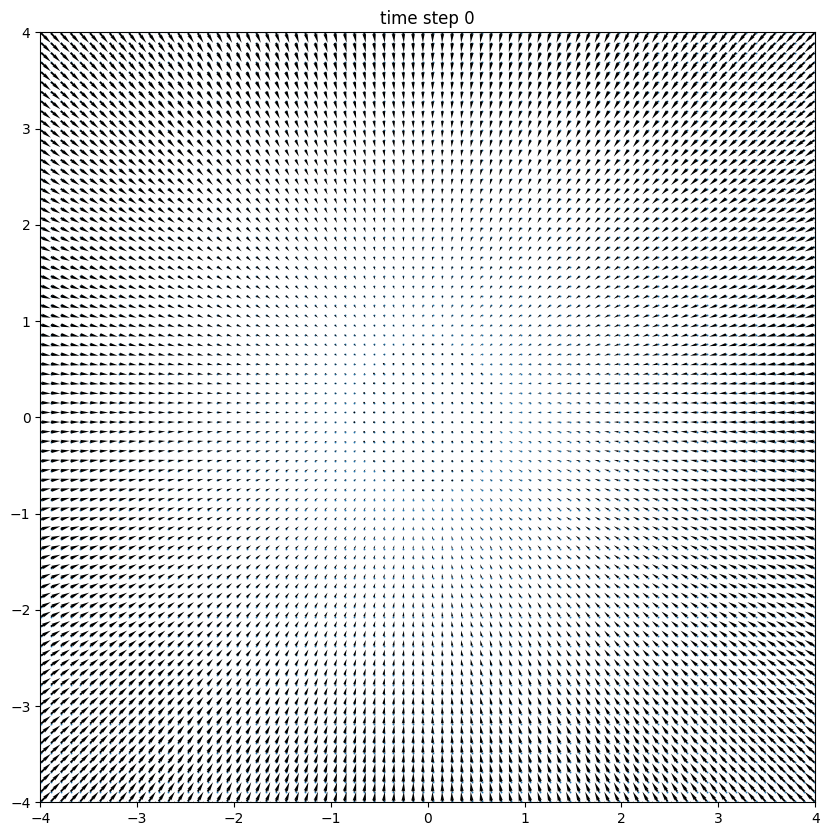

In [44]:
def animate_field(i, hist, hist_field):
    plt.cla()
    x, y = X[:,0], X[:,1]
    u, v = hist_field[i][:,0], hist_field[i][:,1]
    plots = sns.scatterplot(x=hist[i][:,0], y=hist[i][:,1], s=2)
    
    plt.quiver(x, y, -u, -v, headlength=5, headwidth=2, scale_units='xy', scale=40)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.title(f"time step {i*5}")
    return plots

fig = plt.figure(figsize=(10, 10))
plt.clf()

ani = FuncAnimation(
    fig,
    animate_field,
    fargs=[hist, hist_field],
    interval=50,
    blit=False,
    repeat=False,
    frames=len(hist),
)
ani.save(
        os.path.join("animation_field.gif"),
        dpi=200,
        writer=PillowWriter(fps=5),
    )

In [21]:
idx = 10

x, y = X[:,0], X[:,1]
u, v = hist_field[idx][:,0], hist_field[idx][:,1]


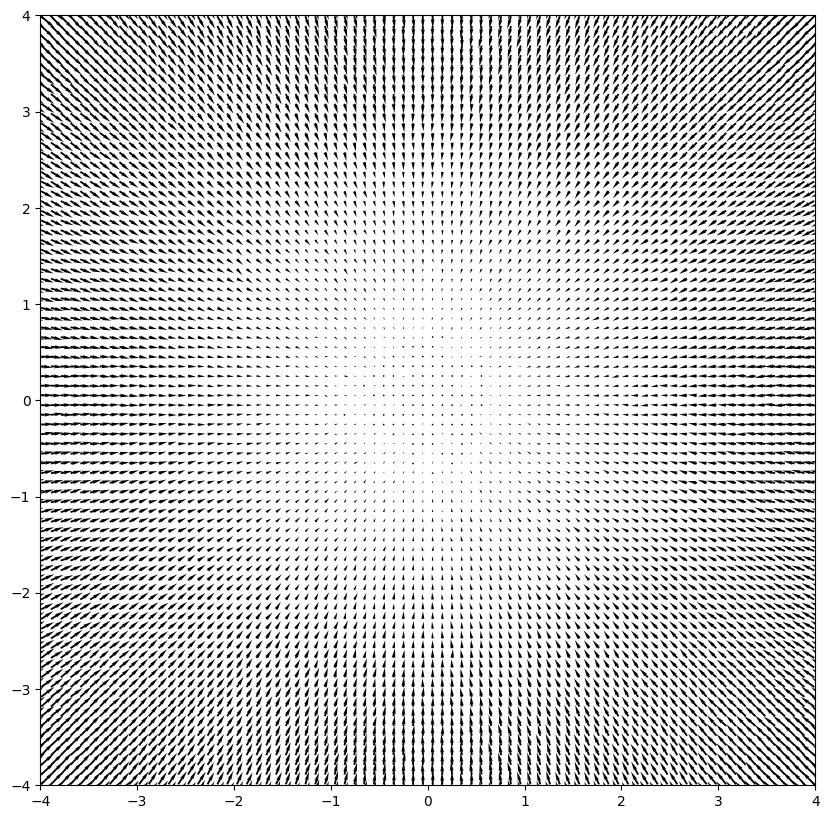

In [42]:
fig = plt.figure(figsize=(10, 10))
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.quiver(x, y, -u, -v, headlength=5, headwidth=2, scale_units='xy', scale=30)
plt.show()

In [55]:
hist.shape

(201, 10000, 2)

In [77]:
hist[:, idx][0,0]

3.989899

In [93]:
hist[-1].shape

(10000, 2)

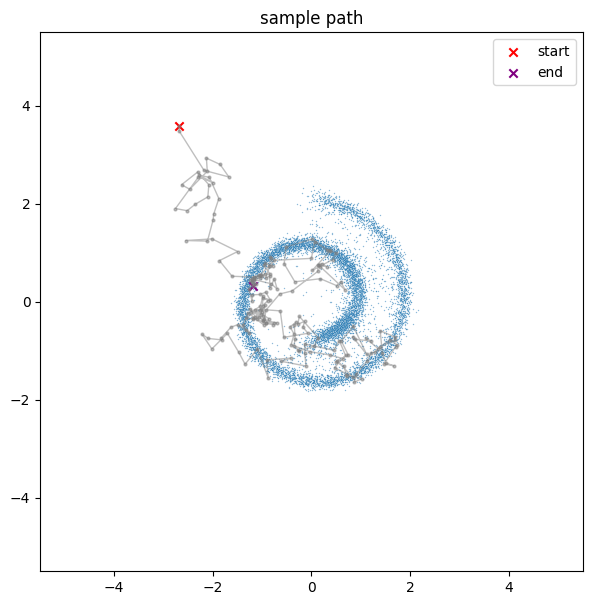

In [124]:
fig = plt.figure(figsize=(7,7))
idx = np.random.randint(hist.shape[1])

sns.scatterplot(x=hist[-1][:,0], y=hist[-1][:,1], s=1, alpha=0.5)

plt.plot(hist[:, idx][:,0], hist[:, idx][:,1], linewidth=1, c="gray", alpha=0.5, marker="o", markersize=2)

plt.scatter(hist[:, idx][0,0], hist[:, idx][0,1], marker="x", c="red", label="start")
plt.scatter(hist[:, idx][-1,0], hist[:, idx][-1,1], marker="x", c="purple", label="end")

plt.title("sample path")
plt.ylim(-5.5, 5.5)
plt.xlim(-5.5, 5.5)
plt.legend()
plt.show()